In [32]:

from openseespy.opensees import *
wipe()
model('Basic', '-ndm', 3)

# Materiales y secciones
hr = 0.3
br = 0.5
E = 2.1e6
v = 0.2
G = E / (2 * (1 + v))
A = hr * br
Jx = 0.002822 # hr*br**3*(16/3 - 3.36*br/hr*(1-(br/hr)**4/12))/16
Iy = hr * br**3 / 12
Iz = br * hr**3 / 12
Asy = 5/6 * A
Asz = 5/6 * A

node(1, 0, 0, 0)
node(2, 4, 0, 0)
geomTransf("Linear", 1, *[0, 0, 1])
element('ElasticTimoshenkoBeam', 1, *[1, 2], E, G, A, Jx, Iy, Iz, Asy, Asz, 1)
fix(1, *[1, 1, 1, 1, 1, 1])

timeSeries('Linear', 1)
pattern('Plain', 1, 1)
eleLoad('-ele',1,'-type','beamUniform',*[0,0,-10000])
constraints('Transformation')
numberer('RCM')
system('BandGeneral')
integrator('LoadControl', 1.0)
algorithm('Linear')
analysis('Static')
analyze(1)


0

0.01

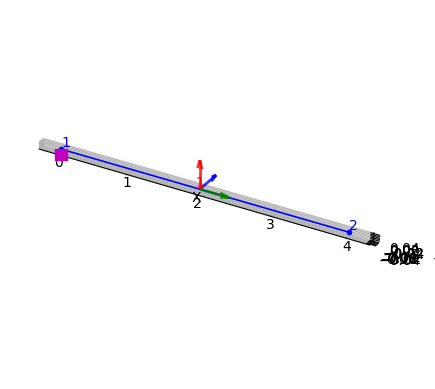

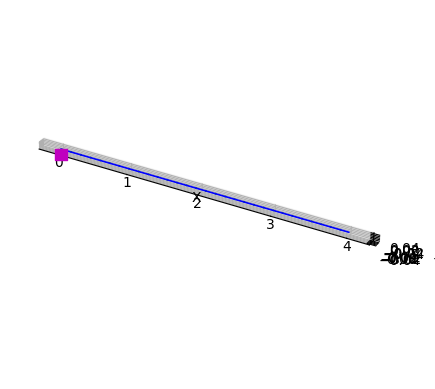

In [33]:
import opsvis as opsv
import matplotlib.pyplot as plt
opsv.plot_model()
opsv.plot_defo(0.01)

In [34]:
import numpy as np

ele_tag = 1
xloc = eleResponse(ele_tag, 'xlocal')
yloc = eleResponse(ele_tag, 'ylocal')
zloc = eleResponse(ele_tag, 'zlocal')
g = np.vstack((xloc, yloc, zloc))

print(g)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [35]:

import pandas as pd
data = {}
for i in [1, 2]:
    node_disp = nodeDisp(i)
    data[f"Node {i}"] = node_disp

df = pd.DataFrame(data, index=['UX', 'UY', 'UZ', 'RX', 'RY', 'RZ']).round(6)
print(df)

    Node 1    Node 2
UX     0.0 -0.253968
UY     0.0  0.000000
UZ     0.0  0.000000
RX     0.0  0.000000
RY     0.0  0.000000
RZ     0.0  0.000000
